In [1]:
from applications.denoiser_environment import DenoiserEnvironment

In [4]:
PATH_BASE = "/home/amedvedev/fprojects/python/denoising"

width, height = 100, 100
env = DenoiserEnvironment(name_model="model_9", name_dataset="gcg6", path_base=PATH_BASE)

In [3]:
generate_settings = [("train", 700), ("val", 250)]

for (data_category, count) in generate_settings:
    env.generate_data("gcg6", data_category, n=count, width=width, height=height, cell_size=2, pct_noise=0.05,
                      csv=True, txt=True, png=True)



Generating dataset gcg6/train...
Progress: |██████████████████████████████| 100.0% Complete | 

Generating dataset gcg6/val...
Progress: |██████████████████████████████| 100.0% Complete | 



In [5]:
env.init_model()

New model created.


In [3]:
env.load_model(model_type="pt")

In [6]:
env.load_data(width, height, batch_size=4)

/home/amedvedev/fprojects/python/denoising/venv/lib/python3.10/site-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


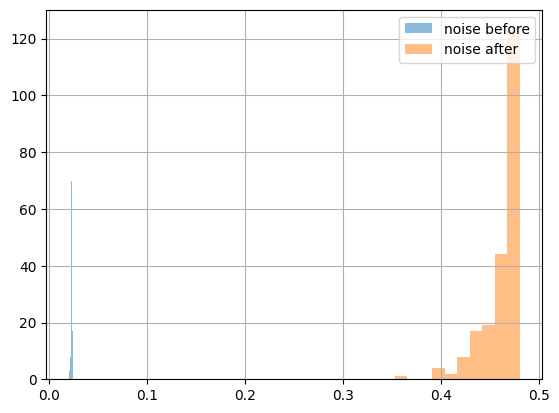

In [7]:
scores_before, scores = env.score(show=True)

In [9]:
env.train(6, step_saving=True, step_plotting=True)

Step results plotted to /home/amedvedev/fprojects/python/denoising/runs/train_plots/gcg6/model_9.
Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 1 	Training Loss: 0.054433 	Validating Loss: 0.007359 	Time: 0.30 m
Step results plotted to /home/amedvedev/fprojects/python/denoising/runs/train_plots/gcg6/model_9.


Training progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Validating progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Epoch: 2 	Training Loss: 0.004323 	Validating Loss: 0.002164 	Time: 0.29 m
Model saved successfully at /home/amedvedev/fprojects/python/denoising/assets/pt/model_9.pt.
Step results plotted to /home/amedvedev/fprojects/python/denoising/runs/train_plots/gcg6/model_9.


Training progress: |██████████████████████████████████████████████████| 100.0% Complete

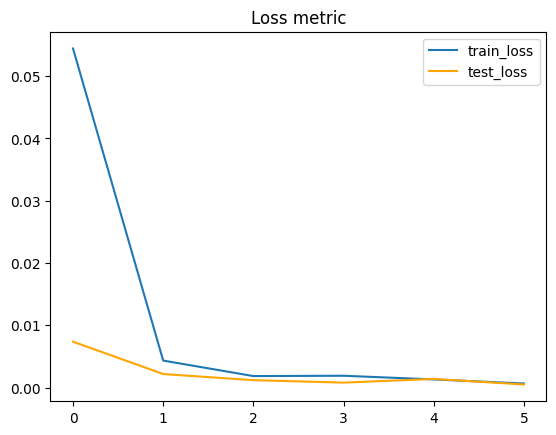

In [10]:
env.show_metrics()

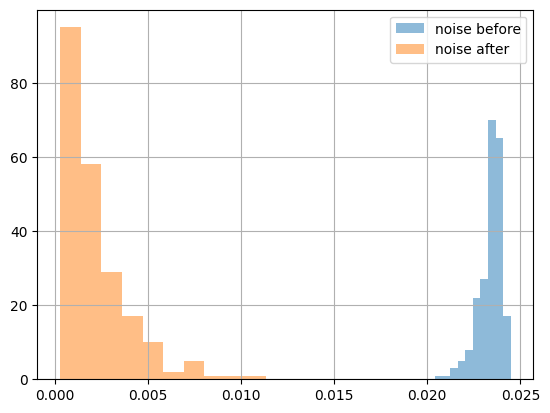

In [11]:
scores_before, scores = env.score(show=True)

In [16]:
env.save(pth=True, onnx=False)

In [13]:
env.test_on_dataset(include_train=False, include_test=True)

Testing data: /home/amedvedev/fprojects/python/denoising/data/datasets/gcg6/val
Progress: |██████████████████████████████████████████████████| 100.0% Complete | 

Testing ended.


Show example №12


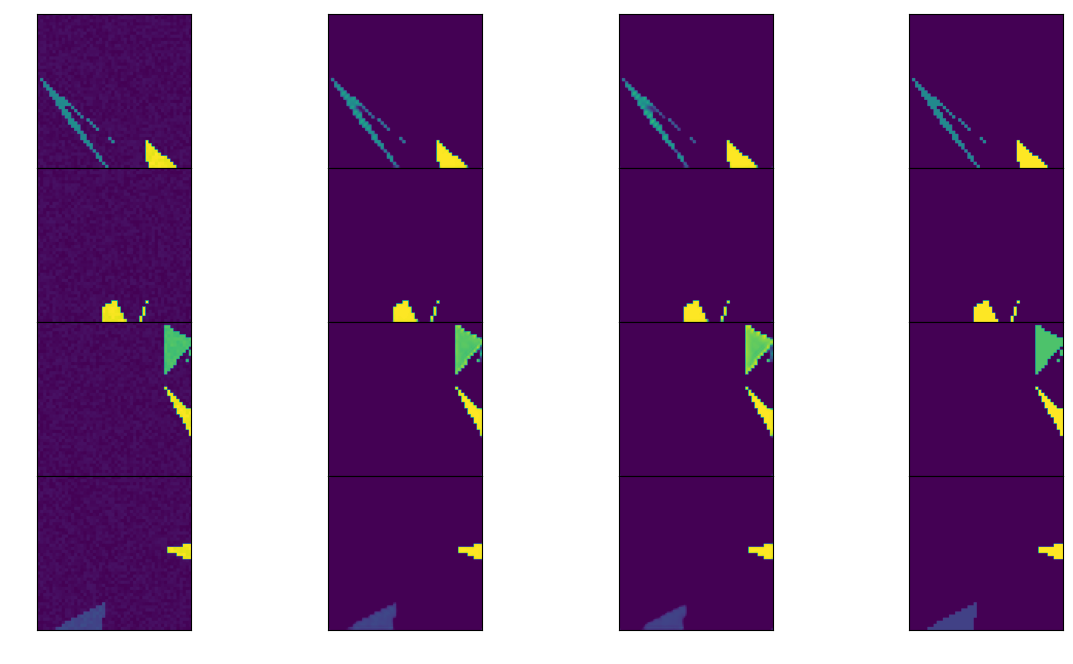

In [15]:
env.show_single(concrete=None, op_count=2, figsize=(15, 8))